# OPTICS
OPTICS (Ordering Points To Identify the Clustering Structure) is a clustering algorithm that is an extension of DBSCAN. It works by creating an ordering of the database, built on the density-based clustering structure. OPTICS can handle varying densities and does not require the specification of the number of clusters.

## Use Cases
- Geospatial Data: Identifying regions with varying densities.
- Anomaly Detection: Detecting outliers in datasets with varying densities.
- Market Segmentation: Grouping customers based on purchasing behavior with varying densities.

## Advantages
- Handles Varying Densities: Unlike DBSCAN, OPTICS can find clusters with varying densities.
- Automatic Cluster Extraction: Can extract clusters automatically without specifying the number of clusters.
- Noise Handling: Identifies and handles noise points effectively.

## Disadvantages
- Computational Complexity: Can be computationally intensive on large datasets.
- Parameter Sensitivity: Results can vary significantly with different values of epsilon and minPts.

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import itertools


## plot_elbow_method

In [2]:
def plot_reachability(optics):
    """
    Plots the reachability plot to help visualize the clustering structure.
    """
    space = np.arange(len(optics.ordering_))
    reachability = optics.reachability_[optics.ordering_]

    plt.figure(figsize=(10, 6))
    plt.bar(space, reachability, width=1)
    plt.xlabel("Points")
    plt.ylabel("Reachability Distance")
    plt.title("Reachability Plot")
    plt.grid(True)
    plt.show()


## grid_search_minpts 

In [3]:
def grid_search_min_samples(X, feature_count):
    """
    Performs a grid search to determine the optimal min_samples value for OPTICS.
    """
    min_samples_range = range(feature_count + 1, 2 * feature_count + 1)
    if feature_count == 1:
        min_samples_range = [3, 4]

    best_min_samples = min_samples_range[0]
    best_silhouette = -1

    for min_samples in min_samples_range:
        optics = OPTICS(min_samples=min_samples)
        labels = optics.fit_predict(X)

        if len(set(labels)) > 1:
            silhouette = silhouette_score(X, labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_min_samples = min_samples

    return best_min_samples


## dbscan_clustering

In [4]:
def optics_clustering(X, min_samples=None):
    """
    Performs OPTICS clustering on the dataset X and determines the optimal
    min_samples value. If min_samples is provided, it is used directly.
    """
    feature_count = X.shape[1]

    # Step 1: Determine optimal min_samples using grid search or use provided min_samples
    if min_samples is None:
        optimal_min_samples = grid_search_min_samples(X, feature_count)
        print(f"Optimal min_samples: {optimal_min_samples}")
    else:
        optimal_min_samples = min_samples
        print(f"Using provided min_samples: {optimal_min_samples}")

    # Step 2: Perform OPTICS clustering
    optics = OPTICS(min_samples=optimal_min_samples)
    labels = optics.fit_predict(X)

    # Count the number of clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Number of clusters: {n_clusters}")

    # Plot the reachability plot
    plot_reachability(optics)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # Black used for noise.

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title("OPTICS Clustering Results")
    plt.show()

    return labels


Optimal min_samples: 3
Number of clusters: 428


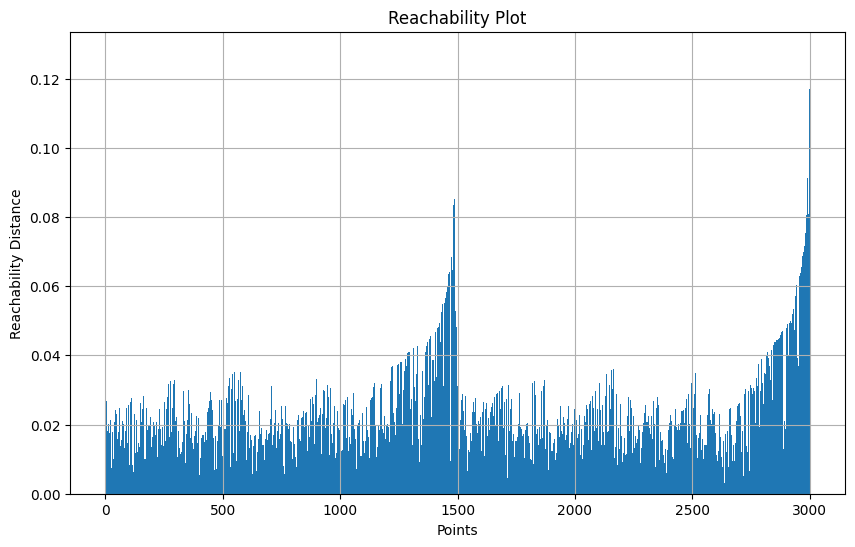

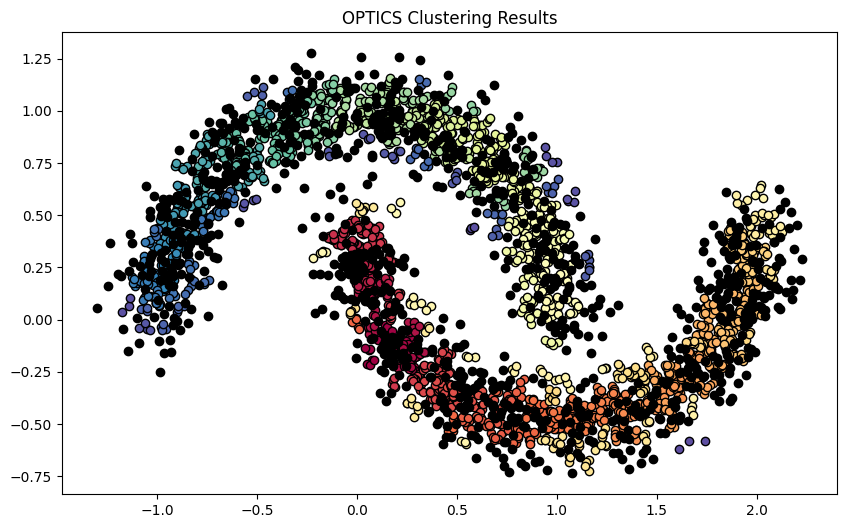

In [6]:
from sklearn.datasets import make_blobs, make_moons

# Generate sample data
X, _ = make_moons(n_samples=3000, noise=0.1, random_state=42)

# Perform DBSCAN clustering
labels = optics_clustering(X)
